

"""
### Question:


#### Image Classification using the Celebrity Faces Dataset

You are tasked with designing an image classification architecture and using it to classify images from the Celebrity Faces Dataset, which consists of images belonging to 17 different celebrity classes. Follow the steps below to complete this task:

1. **Design an Image Classification Architecture**:
    - Create a convolutional neural network (CNN) architecture for image classification. The architecture should include:
        - Input layer suitable for the image size of the Celebrity Faces Dataset (images are generally around 474 pixels in one dimension).
        - Convolutional layers, pooling layers, and fully connected layers. Customize the number, type, and order of layers as you see fit.
        - Use suitable activation functions throughout the network.
        - Implement dropout or any other regularization techniques as needed.

2. **Compile the Model**:
    - Select an appropriate loss function and optimizer for multi-class classification.
    - Compile the model using your chosen parameters.

3. **Prepare and Split the Dataset**:
    - Load and preprocess the Celebrity Faces Dataset. Ensure to handle data augmentation if necessary.
    - Resize each image to a uniform size suitable for your model's input layer (e.g., resize images to 224x224 pixels).
    - Split the dataset into training and validation sets.

4. **Train the Model**:
    - Train the model using the training set of the Celebrity Faces Dataset.
    - Monitor the training process and adjust hyperparameters as needed.
    - Validate the model using the validation set.

5. **Evaluate the Model**:
    - Evaluate the performance of your model on the validation set.
    - Provide metrics such as accuracy, precision, recall, and F1-score.

6. **Classify New Images**:
    - During the exam, you will be provided with new images from the Celebrity Faces Dataset. Use your trained model to classify these images.
    - Report the predicted labels for the new images and discuss any challenges faced.

7. **Documentation and Analysis**:
    - Document your entire process, including:
        - Architecture design decisions.
        - Hyperparameter choices.
        - Training and evaluation procedures.
        - Results and analysis of the model's performance.

#### Notes:
- Utilize Python and a deep learning framework of your choice (e.g., TensorFlow, Keras) for implementing the CNN.
- The images in the Celebrity Faces Dataset should be resized to 224x224 pixels for consistency in input size.
- Ensure your code is well-structured and easy to follow, with clear comments where necessary.



Good luck with your preparation!
"""


Loaded images shape: (1799, 224, 224, 3)
Loaded labels shape: /n Images with Folder name (1799,) /n Images with Folder name


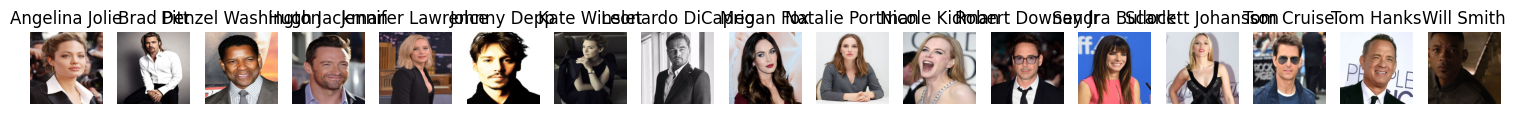

In [2]:
#Code for Loading the image
# Code for loading the dataset and plotting, with folder name

# first upload the dataset in google drive
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set up the directory path where your dataset is located
dataset_directory = '/content/drive/MyDrive/dataset/Celebrity Faces Dataset'

# Function to load the dataset
def load_dataset(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Assumes each subdirectory is a class

    for i, class_name in enumerate(class_names):
        class_directory = os.path.join(directory, class_name)
        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path)
                image = image.resize((224, 224))  # Resize if necessary
                image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
                images.append(image)
                labels.append(i)  # Store index of the class

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, class_names

    # Usage example
images, labels, class_names = load_dataset(dataset_directory)

# Print shape of loaded data for verification
print("Loaded images shape:", images.shape)
print("Loaded labels shape: /n Images with Folder name", labels.shape, "/n Images with Folder name")

# Plotting example: Plot one example image from each class
num_classes = len(class_names)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))

for i, class_name in enumerate(class_names):
    class_indices = np.where(labels == i)[0]
    example_image = images[class_indices[0]]
    axes[i].imshow(example_image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
def create_cnn_model(input_shape=(224, 224, 3), num_classes=17):
    model = models.Sequential()

    # Input layer
    model.add(layers.InputLayer(input_shape=input_shape))

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten
    model.add(layers.Flatten())

    # Fully Connected Layer 1
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Fully Connected Layer 2
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


In [5]:
model = create_cnn_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
# Step 3: Prepare and Split the Dataset
# Image size
img_height, img_width = 224, 224

# Data augmentation and data loading
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    dataset_directory,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # set as training data
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    dataset_directory,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # set as validation data
)


Found 1440 images belonging to 17 classes.
Found 359 images belonging to 17 classes.


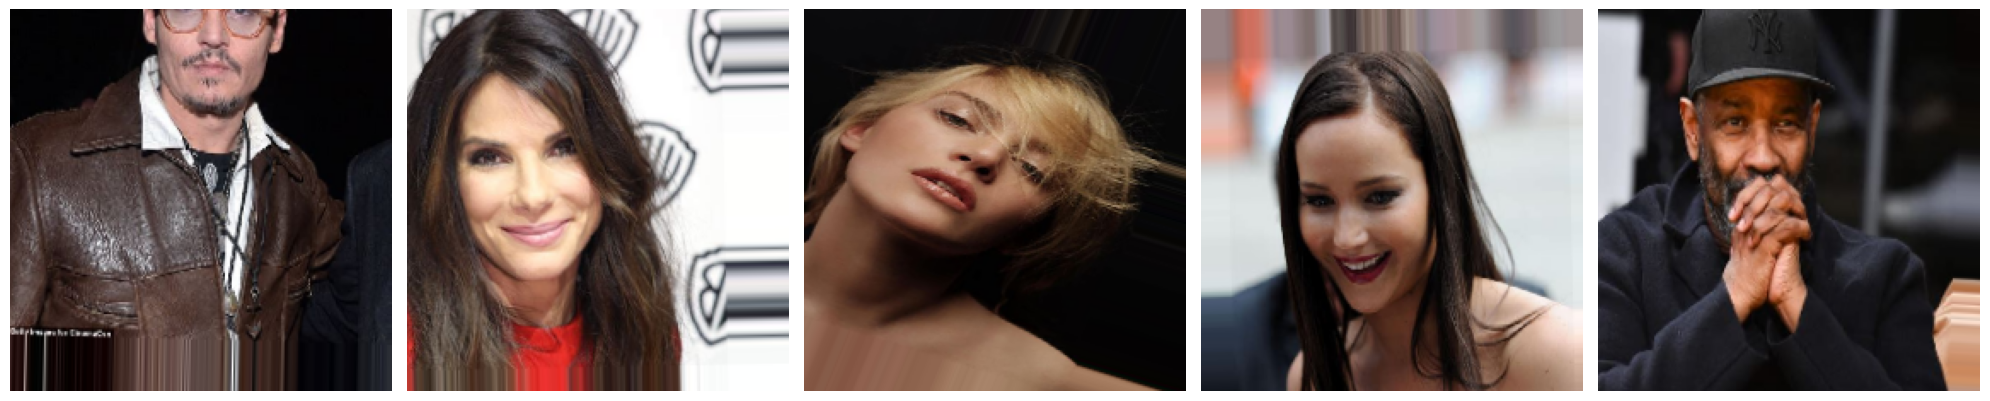

In [7]:
# Function to display images in a grid
def display_images(generator):
    x, y = next(generator)
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(x, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Display sample images from the training set
display_images(train_generator)

In [21]:
#Train the Model

history = model.fit(
    train_generator,
    epochs=10,  # Change to 10 epochs
    validation_data=validation_generator,
    batch_size=32
)

Epoch 1/10
45/45 [==============================] - 227s 5s/step - loss: 2.9272 - accuracy: 0.0722 - val_loss: 2.8285 - val_accuracy: 0.1114
Epoch 2/10
45/45 [==============================] - 217s 5s/step - loss: 2.8234 - accuracy: 0.0993 - val_loss: 2.8266 - val_accuracy: 0.1114
Epoch 3/10
45/45 [==============================] - 218s 5s/step - loss: 2.8244 - accuracy: 0.1063 - val_loss: 2.8153 - val_accuracy: 0.1114
Epoch 4/10
45/45 [==============================] - 224s 5s/step - loss: 2.8188 - accuracy: 0.1069 - val_loss: 2.7914 - val_accuracy: 0.1114
Epoch 5/10
45/45 [==============================] - 218s 5s/step - loss: 2.7919 - accuracy: 0.1083 - val_loss: 2.7533 - val_accuracy: 0.1114
Epoch 6/10
45/45 [==============================] - 219s 5s/step - loss: 2.7851 - accuracy: 0.1146 - val_loss: 2.7244 - val_accuracy: 0.1142
Epoch 7/10
45/45 [==============================] - 216s 5s/step - loss: 2.7422 - accuracy: 0.1236 - val_loss: 2.6746 - val_accuracy: 0.1309
Epoch 8/10
45

In [22]:
# Evaluate model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation loss: {val_loss}, Validation accuracy: {val_accuracy}')

12/12 [==============================] - 19s 1s/step - loss: 2.5907 - accuracy: 0.1476
Validation loss: 2.590724468231201, Validation accuracy: 0.14763231575489044


In [23]:
# Predictions
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

12/12 [==============================] - 18s 1s/step


In [24]:
# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))


                    precision    recall  f1-score   support

    Angelina Jolie       0.00      0.00      0.00        20
         Brad Pitt       0.00      0.00      0.00        20
 Denzel Washington       0.00      0.00      0.00        20
      Hugh Jackman       0.00      0.00      0.00        20
 Jennifer Lawrence       0.00      0.00      0.00        19
       Johnny Depp       0.00      0.00      0.00        20
      Kate Winslet       0.00      0.00      0.00        20
 Leonardo DiCaprio       0.10      0.20      0.14        20
         Megan Fox       0.00      0.00      0.00        20
   Natalie Portman       0.00      0.00      0.00        20
     Nicole Kidman       0.00      0.00      0.00        20
  Robert Downey Jr       0.00      0.00      0.00        20
    Sandra Bullock       0.00      0.00      0.00        20
Scarlett Johansson       0.13      0.72      0.21        40
        Tom Cruise       0.00      0.00      0.00        20
         Tom Hanks       0.05      0.20

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)

[[ 0  0  3  0  0  0  0  4  0  0  0  0  0 11  0  2  0]
 [ 0  0  1  0  0  0  0  1  0  0  0  0  0 12  0  6  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0 14  0  3  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0 11  0  6  0]
 [ 0  1  1  1  0  0  0  0  0  0  0  0  0 10  0  6  0]
 [ 0  0  2  0  0  0  0  3  0  0  0  0  0  9  0  6  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0 16  0  1  0]
 [ 0  0  1  0  0  0  0  4  0  0  0  0  0 11  0  4  0]
 [ 0  0  1  0  0  0  0  1  0  0  0  0  0 16  0  2  0]
 [ 0  0  3  0  0  0  0  1  0  0  0  0  0 12  0  4  0]
 [ 0  1  0  0  0  0  0  3  0  0  0  0  0 11  0  5  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0 10  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  3  0]
 [ 0  0  1  0  0  0  0  3  0  0  0  0  0 29  0  7  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0 15  0  3  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0 14  0  4  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0 12  0  5  0]]


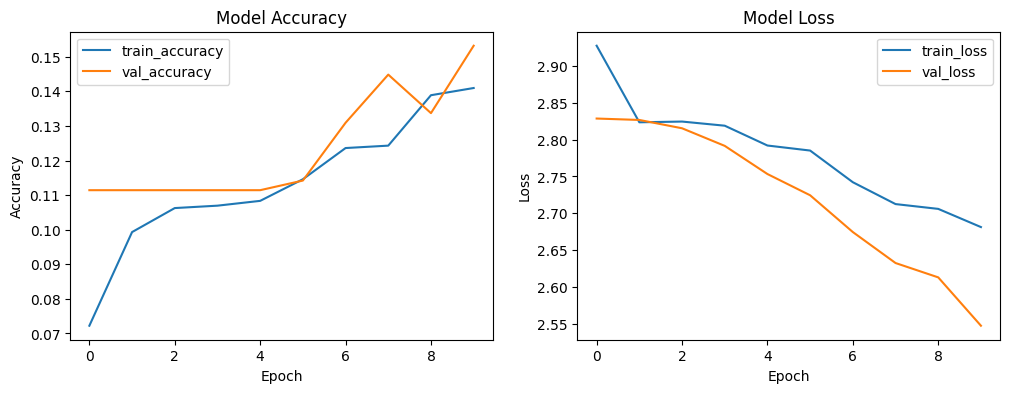

In [26]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [27]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

**Theoy Question**

1. What is Mean Average Precision (mAP) in the context of object detection, and how is it calculated?

Mean Average Precision (mAP) is a metric used to evaluate the accuracy of object detection models. It combines precision and recall across multiple classes to provide a single performance measure. Here's how it's calculated:

Intersection over Union (IoU): Calculate the IoU for each predicted bounding box with the ground truth box. A prediction is correct if IoU exceeds a threshold (e.g., 0.5).

Precision and Recall: For each class, sort predictions by confidence score. Compute precision (TP / (TP + FP)) and recall (TP / (TP + FN)) at each confidence threshold.

Precision-Recall Curve: Plot precision against recall for each class.

Average Precision (AP): Calculate the area under the precision-recall curve for each class.
Mean Average Precision (mAP): Average the APs across all classes.

 2. Explain the main differences between RCNN, Fast RCNN, and Faster RCNN.


 Main differences between RCNN, Fast RCNN, and Faster RCNN are

 RCNN-

 *Uses selective search to find possible objects.

 *Runs a CNN on each region separately for feature extraction.

 *Slow and computationally expensive.

 Fast RCNN-

 *Uses selective search for region proposals.

 *Runs a CNN once on the entire image to produce a feature map.

 *Faster than RCNN due to shared CNN computations.

 Faster RCNN

 *Runs a CNN once on the entire image to produce a feature map.

 *RPN generates region proposals directly from the feature map.

 *Fastest and most efficient due to integrated region proposal generation.





3.How does the Region Proposal Network (RPN) in Faster RCNN improve the efficiency of the detection process?

The Region Proposal Network (RPN) in Faster RCNN improves efficiency by integrating region proposal generation directly into the CNN. Instead of using a separate algorithm like selective search, the RPN generates region proposals from the feature map produced by the CNN. This means the entire image is processed only once, and the RPN quickly identifies potential object regions, making the overall detection process much faster and more efficient.

4.Describe the architecture and working principle of the YOLO (You Only Look Once) object detection algorithm.

The YOLO (You Only Look Once) algorithm is an object detection model that divides an image into a grid and predicts bounding boxes and class probabilities for each grid cell in a single pass through the network. Here's how it works:

Single Neural Network: A single CNN processes the entire image, producing a feature map.

Grid Division: The image is divided into an SxS grid.

Bounding Box Predictions: Each grid cell predicts a fixed number of bounding boxes and their confidence scores.

Class Predictions: Each grid cell predicts class probabilities for the presence of an object.

Single Pass: Both bounding box coordinates and class probabilities are predicted simultaneously in one forward pass, making YOLO very fast.

5.What are the key improvements introduced in YOLOv2 (YOLO9000) compared to the original YOLO algorithm?

Some of the key improvements are

Batch Normalization: Applied across the network to stabilize training and improve convergence.


High-Resolution Classifier: Trained with higher-resolution input images to enhance detection accuracy.


Anchor Boxes: Introduced predefined anchor boxes to predict bounding boxes more accurately.


Dimension Clusters: Used k-means clustering on bounding box dimensions to choose better anchor box sizes.


Multi-Scale Training: The model is trained with images of varying sizes to improve robustness and flexibility.


Pascal VOC and COCO Training: Combined datasets for better generalization and increased object detection classes.